# Predicting Car Prices Based on Features

The goal of this project is to utilize the K Nearest Neighbors algorithm to see if we can predict car prices using data about car features vs. known car prices.  

The data comes from the UC Irvine Machine Learning Repository and can be found at the following location:

__[Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)__


### Feature list from the data source site

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split

%matplotlib inline

# Setting some default graph styles
sns.set_style("white", {'axes.edgecolor': '#b2b2b2'})
sns.set_context("notebook", font_scale=1.25)

# Data Analysis and Cleaning

In [2]:
cars_original = pd.read_csv('imports-85.data')

In [3]:
cars_original.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Looks like the data has no header row.  The column names pandas chose are actually data from the first entry.  Let's create a list of the real column names.

In [4]:
columns = ['symboling', 'normalized_losses', 'make',
           'fuel-type', 'aspiration', 'num-of-doors',
           'body-style', 'drive-wheels', 'engine-location',
           'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-type',
           'num-of-cylinders', 'engine-size', 'fuel-system',
           'bore', 'stroke', 'compression-ratio',
           'horsepower', 'peak-rpm', 'city-mpg',
           'highway-mpg', 'price']

In [5]:
cars_original = pd.read_csv('imports-85.data', names=columns, header=None)

In [6]:
# We want to see all of the columns for examination when we display the dataframe
pd.set_option('display.max_columns', 26)

In [7]:
cars_original.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The target prediction column is: **price**

The following columns appear to be both numeric (or can be converted to numeric) and ordinal.  These will be our features.

- normalized_losses
- wheel-base
- length
- width
- height
- curb-weight
- num-of-cylinders
- engine-size
- bore
- stroke
- compression-ratio
- horsepower
- peak-rpm
- city-mpg
- highway-mpg

In [8]:
keep_columns = ['normalized_losses',
                'wheel-base',
                'length',
                'width',
                'height',
                'curb-weight',
                'num-of-cylinders',
                'engine-size',
                'bore',
                'stroke',
                'compression-ratio',
                'horsepower',
                'peak-rpm',
                'city-mpg',
                'highway-mpg',
                'price']

In [9]:
# Creating a new dataframe using only the columns we want to use as features
cars = cars_original[keep_columns]

In [10]:
cars.head()

,normalized_losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


The **normalized_losses** column has question marks instead of null values.  Let's replace question marks with NaN throughout the data frame.

In [11]:
cars = cars.replace('?', np.nan)

Now lets see where things are regarding the data types for the columns:

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 25.7+ KB


The **num-of-cylinders** column contains words for numbers rather than numbers.  Let's see what words are used:

In [13]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

Not that many distinct values. Let's whip up a quick dictionary for substitution.

In [14]:
num_dict = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3}

In [15]:
cars['num-of-cylinders'] = cars['num-of-cylinders'].apply(lambda x: num_dict.get(x, np.nan))

In [16]:
cars['num-of-cylinders'].head()

0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

All other columns apper to be number-ish.  Let's try a mass conversion of the entire data frame to float.

In [17]:
cars = cars.astype('float')
cars.head()

,normalized_losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Now let's take a look at how many missing values we have.  A little bar chart gives a nice visual representation:

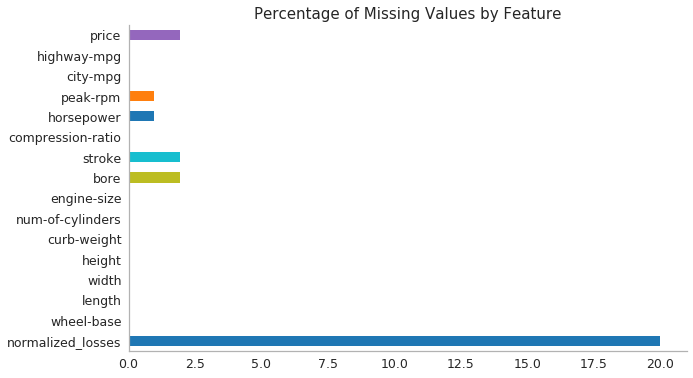

In [18]:
cars.isnull().sum().apply(lambda x: x / cars.shape[0] * 100).plot(kind='barh', figsize=(10,6));
plt.title('Percentage of Missing Values by Feature')
sns.despine()

The **normalized_losses** column indicates an average yearly insurance loss for that particular car. This should not factor into the initial price of the car, and it is missing quite a bit of data.  Let's drop it.

In [19]:
cars.drop('normalized_losses', inplace=True, axis=1)

For the remaining missing data, let's use a simple mean imputation to fill in the values.

In [20]:
imp = Imputer(strategy='mean')

In [21]:
cars['peak-rpm'] = imp.fit_transform(cars[['peak-rpm']])
cars['horsepower'] = imp.fit_transform(cars[['horsepower']])
cars['stroke'] = imp.fit_transform(cars[['stroke']])
cars['bore'] = imp.fit_transform(cars[['bore']])

There are still 4 rows missing price data.  Let's drop those rows from the dataframe.

In [22]:
cars.dropna(inplace=True)

In [23]:
cars.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No more empty values.

Now we need to normalize the data so that one particular column doesn't skew the prediction.  **price** should be excluded as it is the target of our prediction.

In [24]:
for column in cars.columns: 
    if column != 'price':
        cars[column] = normalize(cars[[column]], axis=0)

In [25]:
cars.head()

,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.063136,0.068178,0.068585,0.063953,0.068932,0.062846,0.068699,0.073249,0.057771,0.058127,0.071229,0.068616,0.057011,0.060592,13495.0
1,0.063136,0.068178,0.068585,0.063953,0.068932,0.062846,0.068699,0.073249,0.057771,0.058127,0.071229,0.068616,0.057011,0.060592,16500.0
2,0.067341,0.069148,0.070083,0.068671,0.076372,0.094269,0.080325,0.056573,0.074801,0.058127,0.098822,0.068616,0.051581,0.058348,16500.0
3,0.071117,0.071329,0.070832,0.071161,0.063224,0.062846,0.057602,0.067338,0.073292,0.064585,0.065454,0.075477,0.065155,0.067324,13950.0
4,0.070832,0.071329,0.071046,0.071161,0.076399,0.078558,0.071870,0.067338,0.073292,0.051668,0.073796,0.075477,0.048866,0.049371,17450.0


# Univariate KNN Prediction

Let's set up a function to split the data into training and testing sets, and utilize the __[KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)__ model to predict the price of the cars in the test set.  The function will return the ***Root Mean Squared Error*** as an indicator of how successful the prediction was.  In this case the **RMSE** will indicate how many dollars off we were between the actual price and the predicted price.

In [26]:
def knn_train_test(train_cols, target_col, df, neighbors=None):
    '''
    Splits a dataframe into training and testing data sets and uses KNN 
    for prediction.
    
    '''
    
    X = df[train_cols]
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
    
    if neighbors:
        knn = KNeighborsRegressor(n_neighbors=neighbors)
    else:
        knn = KNeighborsRegressor()
        
    knn.fit(X_train, y_train)
    
    prediction = knn.predict(X_test)
    
    return mean_squared_error(y_test, prediction) ** .5

In [27]:
# Getting a list of columns to cycle through the model excluding 'price'

test_cols = list(cars.columns)
test_cols.remove('price')

In [28]:
# Creating an empty list to hold the RMSE values returned by our function

rmse_list = []

In [29]:
# Running each feature column through the model function

for col in test_cols:
    rmse = knn_train_test([col], 'price', cars)
    rmse_list.append(rmse)

In [30]:
# For easier graphing and data manipulation, creating a DataFrame out of the results

univ_rmse = pd.DataFrame({'Feature': test_cols, 'RMSE': rmse_list})
univ_rmse.sort_values('RMSE', inplace=True)
univ_rmse

,Feature,RMSE
10,horsepower,2763.151640
6,engine-size,3520.838116
13,highway-mpg,4411.626320
12,city-mpg,4432.043524
2,width,4920.230953
0,wheel-base,5073.837086
1,length,5142.220351
9,compression-ratio,5473.172056
5,num-of-cylinders,5488.230025
4,curb-weight,5655.661814


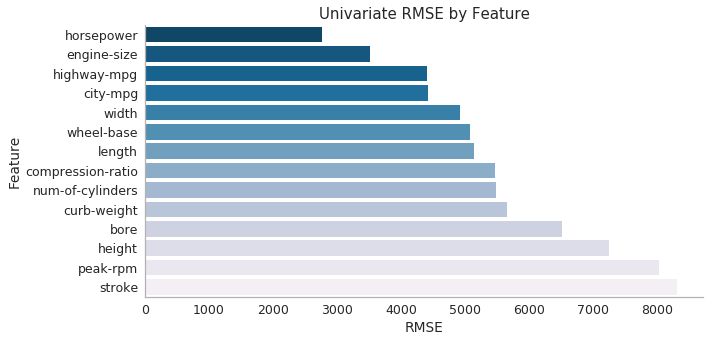

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='RMSE', 
            y='Feature', 
            data=univ_rmse, 
            palette=sns.color_palette("PuBu_r", univ_rmse.shape[0])
           ).set_title('Univariate RMSE by Feature');
sns.despine()

This charts shows which individual features performed best when used alone.  

Next let's try some different values for the ***n_neighbors*** hyperparameter.  

Trying the following values;

1, 3, 5, 7, 9

In [32]:
neighbors = list(range(1,11,2))
neighbors_test = [test_cols]

In [33]:
# For each individual feature, run it through KNN using the 5 values for n_neighbors

for val in neighbors:
    
    rmse_list = []
    
    for col in test_cols:
        rmse = knn_train_test([col], 'price', cars, val)
        rmse_list.append(rmse)  
        
    neighbors_test.append(rmse_list)
        

In [34]:
#Putting the results into a dataframe for eaiser analysis

neighbors_df = pd.DataFrame({'Feature': neighbors_test[0],
                             'n1': neighbors_test[1],
                             'n3': neighbors_test[2],
                             'n5': neighbors_test[3],
                             'n7': neighbors_test[4],
                             'n9': neighbors_test[5]})

neighbors_df.head()

,Feature,n1,n3,n5,n7,n9
0,wheel-base,3855.375266,4477.498422,5073.837086,5265.766176,5532.605531
1,length,5419.078538,5305.376077,5142.220351,5263.152221,5422.949446
2,width,4160.040686,4271.515612,4920.230953,4973.729561,4956.996718
3,height,7219.485592,7313.052880,7257.877142,7392.674438,7597.662563
4,curb-weight,6008.013318,6370.333406,5655.661814,4893.064992,4866.286615


In [35]:
# Using the dataframe mean function to generate a column containing 
# the mean RMSE for each feature across all 5 n_neighbors values

neighbors_df.set_index('Feature', inplace=True)
neighbors_df['Avg. RMSE'] = neighbors_df.mean(axis=1)
neighbors_df.reset_index(inplace=True)
neighbors_df.sort_values('Avg. RMSE', inplace=True)

neighbors_df.head()

,Feature,n1,n3,n5,n7,n9,Avg. RMSE
6,engine-size,3787.550344,2961.833612,3520.838116,3720.003141,4082.346792,3614.514401
10,horsepower,5076.831660,3469.439512,2763.151640,3274.499013,3759.670405,3668.718446
13,highway-mpg,4941.892917,4009.271713,4411.626320,4440.167304,4452.464608,4451.084573
12,city-mpg,5327.593451,4351.875885,4432.043524,4267.310473,4497.140842,4575.192835
2,width,4160.040686,4271.515612,4920.230953,4973.729561,4956.996718,4656.502706


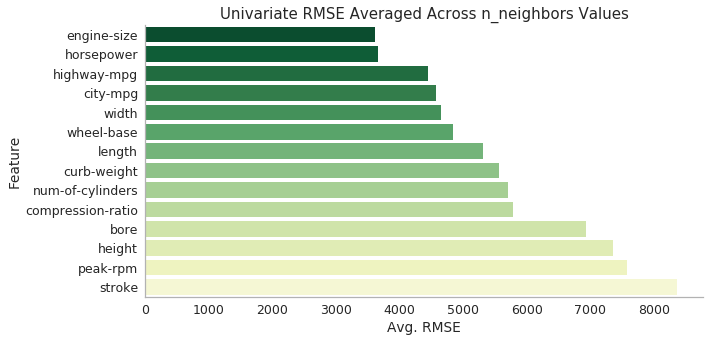

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='Avg. RMSE',
            y='Feature',
            data=neighbors_df, 
            palette=sns.color_palette("YlGn_r", univ_rmse.shape[0])
           ).set_title('Univariate RMSE Averaged Across n_neighbors Values');
sns.despine()

# Multivariate KNN Prediction

Now let's use the 5 best features in different combinations to see how it affects our prediction.  For each combination, we will try n_neighbors values of 1 - 25 as well to find the optimum k value for KNN.

In [37]:
top_5_features = neighbors_df['Feature'][0:5]

In [38]:
best_multi = {'Top 2': [],
              'Top 3': [],
              'Top 4': [],
              'Top 5': []
             }

In [39]:
# Looping over combinations of the top 2 - top 5 features across 1-25 neighbors

for k in range(1,26):
    
    for f in range(2,6):
        
        rmse = knn_train_test(top_5_features[0:f], 'price', cars, k)
        best_multi['Top ' + str(f)].append(rmse)

In [40]:
multi_rmse = pd.DataFrame(best_multi)
multi_rmse['k Nearest Neighbors'] = list(range(1,26))

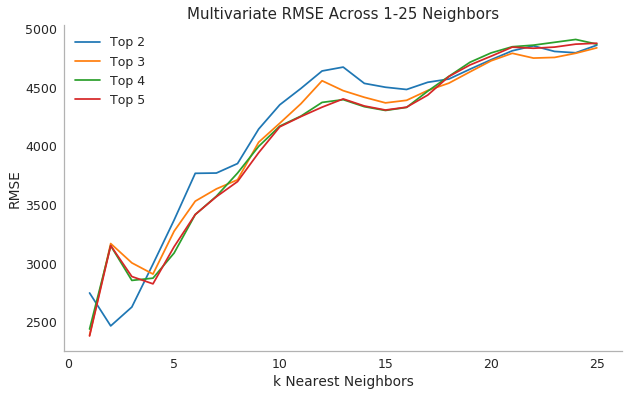

In [41]:
plt.figure(figsize=(10,6))

for key, value in best_multi.items():
    
    plt.plot(multi_rmse['k Nearest Neighbors'], multi_rmse[key], label=key)
    
plt.legend()
plt.title('Multivariate RMSE Across 1-25 Neighbors')
plt.xlabel('k Nearest Neighbors')
plt.ylabel('RMSE')
sns.despine()

In [42]:
# Grabbing the minimum RMSE for each feature combination and its associated k value

multi_rmse_min = pd.DataFrame()

for i in range(2,6):
    
    min_index = multi_rmse['Top ' + str(i)].idxmin
    
    multi_rmse_min = multi_rmse_min.append({'Features': 'Top ' + str(i),
                                            'RMSE': multi_rmse.iloc[min_index]['Top ' + str(i)],
                                            'k Nearest Neighbors': multi_rmse.iloc[min_index]['k Nearest Neighbors']},
                                             ignore_index=True
                                          )

In [43]:
multi_rmse_min.sort_values('RMSE')

,Features,RMSE,k Nearest Neighbors
3,Top 5,2376.237728,1.0
1,Top 3,2382.189353,1.0
2,Top 4,2435.278669,1.0
0,Top 2,2462.210690,2.0


Based on the results, it seems that the best prediction occurs when we use all 5 top Features with a k neighbors setting of 1.  

To reiterate, the top 5 features were:

* engine-size
* horsepower
* highway-mpg
* city-mpg
* width


With those settings we can theoretically predict the car price within +/- $2376.24 of the actual price.

Let's try K-Fold Cross-Validation to see if it improves our prediction

In [44]:
def knn_fold_train_test(train_cols, target_col, df, folds, k_val=None):
    '''
    Uses K-Fold Cross-Validation along with KNN to predict values
    '''

    kf = KFold(folds, shuffle=True, random_state=1)
 
    if k_val:
        model = KNeighborsRegressor(n_neighbors=k_val)
    else:
        model = KNeighborsRegressor()
   
    mses = cross_val_score(model, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
 
    return rmses

In [45]:
# Trying with 5 Folds

knn_fold_train_test(top_5_features, 'price', cars, 5, 1).mean()

2844.9495526433248

In [46]:
# Trying with 10 Folds

knn_fold_train_test(top_5_features, 'price', cars, 10, 1).mean()

2770.6681110723166

Using K-Fold Cross-Validation does not seem to improve our prediction.  

# Conclusion

With this particular data set and using KNeighborsRegressor model, the best prediction we can expect would be a car price within ***$2376.24*** of the actual price.